# Exercise:

The dataset $\texttt{forbes}$ in the R-package $\texttt{MASS}$ contains
17 different observations of $y$ and $x$ at different locations in the
Alps and Scotland, i.e., the data set is $(x^{(i)},y^{(i)})_{i=1}^{17}.$
Analyze whether his conjecture was reasonable by using the following
code snippet:

In [ ]:
#' @param X the feature input matrix X
#' @param y the outcome vector y
#' @param theta parameter vector for the model (2-dimensional)
        
# Load MASS and data set forbes
library(MASS)
data(forbes)
attach(forbes)

# initialize the data set
X = cbind(rep(1,17),bp)
y = pres

#' function to represent your models via the parameter vector theta = c(theta_1, theta_2)
#' @return a predicted label y_hat for x
f <- function(x, theta){
 
  # >>> do something <<<
  
  return(y_hat)
  
}
        
#' @return a vector consisting of the optimal  parameter vector 
optim_coeff <- function(X,y){
 
  # >>> do something <<<
  
  return(theta)
  
}
 
# >>>  Do something here to check Forbes' conjecture <<<

$\emph{Hint:}$ As a sanity check whether your function to find the
optimal coefficients work, it should hold that
$\hat\theta_1 \approx 0.3787548$ and $\hat\theta_2 \approx 0.02062236.$

# Solution:

## Defining the model equation

$$
    y = \theta_1 \exp(\theta_2 x)
$$

In [4]:
#' function to represent your models via the parameter vector theta = c(theta_1, theta_2)
#' @return a predicted label y_hat for x
f <- function(x, theta){
  # Recall that x[1] is always 1 and x[2] is the feature value (bp)
  y_hat <- theta[1] * exp(theta[2]*x[2])
  
  return(y_hat)
}


## Optimal coefficients

We need to minimize the empirical risk. Recall that since we’re using
the generalized L2-loss we have: $$
 L\left(y, f(\mathbf{x ~|~ \bm{\theta} })\right)= \big(\log(y)-\log(f(\mathbf{x ~|~ \bm{\theta}}))\big)^2
$$

and the empirical risk is given by: $$
    \mathcal{R}_{\text{emp}}(\bm{\theta}) = \sum_{i=1}^{n} L\left(y^{(i)}, f(\mathbf{x}^{(i)} ~|~ \bm{\theta})\right)
$$

For the optimization we will use the L-BFGS (Limited-memory BFGS)
method. You can learn more about it
[here](https://en.wikipedia.org/wiki/Limited-memory_BFGS). Also, you can
refer to our [optimization
course](https://slds-lmu.github.io/website_optimization/) to get the
idea of second-order methods, learns the concept of symmetric rank-1
update and the BFGS method.

In [ ]:
#' @return a vector consisting of the optimal parameter vector 
optim_coeff <- function(X,y){
  
  #' @return the empirical risk of a parameter vector theta
  emp_risk <- function(theta){
    sum((log(y) - log(apply(X,1,f,theta)))^2)
  }
 
  return( 
    optim(c(0.4,0.5), 
          emp_risk, 
          method = "L-BFGS-B", 
          lower=c(0,-Inf), 
          upper=c(Inf,Inf))$par)
  # note that c(0.4,0.5) can be replaced by any other theta vector 
  # satisfying the constraint theta[1]>0
}

# optimal coefficients
hat_theta = optim_coeff(X,y)
cat("hat_theta = ", hat_theta)

hat_theta =  0.3805097 0.02059961

## Checking Forbes’ conjecture

As we can see the conjecture is quite reasonable, and we experiance a
big residual only for the point $x \backsimeq  205$.

Also, the Mean Absolute Percentage Error (MAPE) is only around $0.4\%$.

### Visually

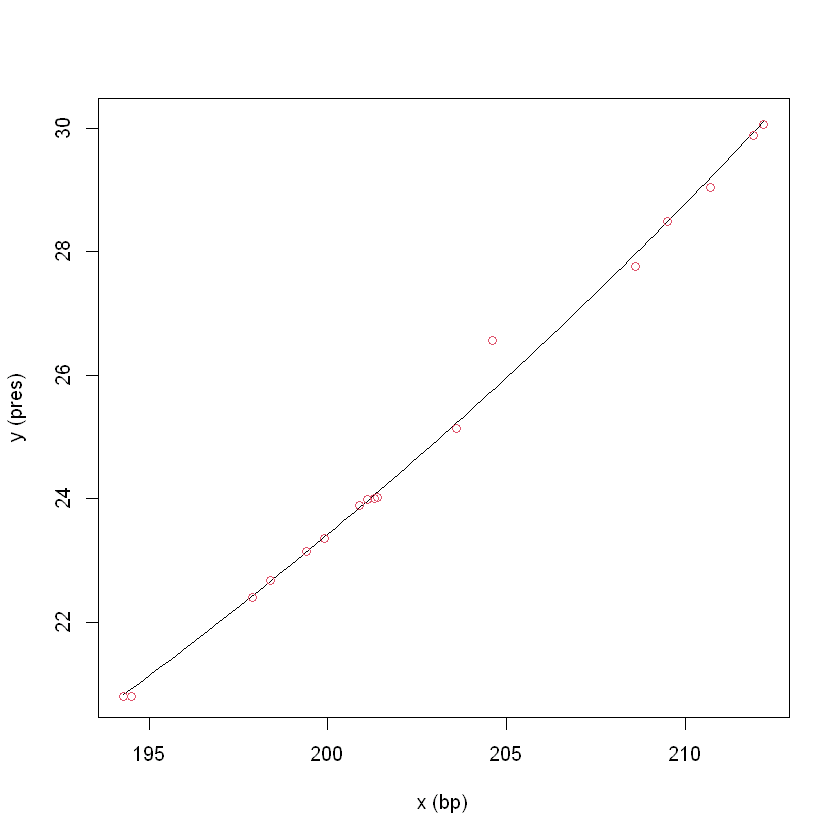

In [6]:
f_x <- function(x, theta){
  
  return((theta[1] * exp(theta[2]*x)))
  
}

curve(f_x(x,theta = hat_theta),min(bp),max(bp),xlab="x (bp)",ylab="y (pres)")
points(pres~bp,col=2)

### MAPE

In [7]:
mape <- function(X,y,theta){
  y_hat = apply(X,1,f,theta)
  perc_error = abs((y - y_hat)/y) * 100
  return(mean(perc_error))
}
cat("Mean Absolute Percentage Error (MAPE):", mape(X,y,hat_theta), "%\n")

Mean Absolute Percentage Error (MAPE): 0.4106409 %

# Alternative solution

Luckily, we had derived an analytic solution earlier, and given that
dataset size is quite small, we can directly apply it.

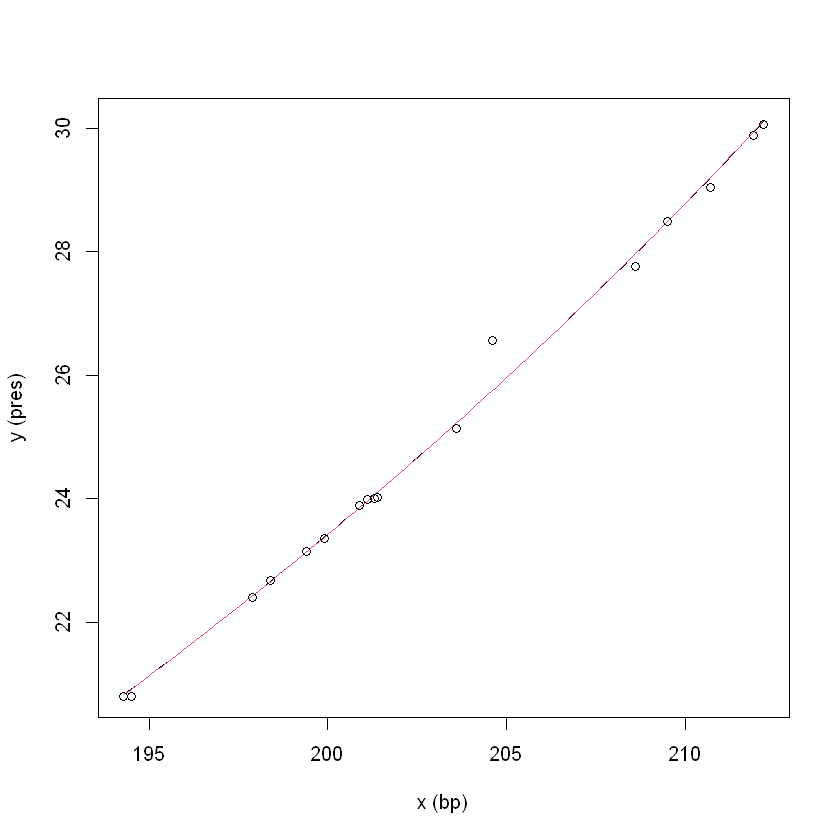

In [8]:
hat_theta_2 = cov(bp,log(pres))/(var(bp)) 
hat_theta_1 = exp(mean(log(pres))-hat_theta_2*mean(bp))

curve(f_x(x,theta = hat_theta),min(bp),max(bp),xlab="x (bp)",ylab="y (pres)")
curve(f_x(x,theta = c(hat_theta_1,hat_theta_2)),min(bp),max(bp),add=T,col=2)
points(pres~bp)

# Full code

The following objects are masked from forbes (pos = 3):

    bp, pres



hat_theta =  0.3805097 0.02059961 
Mean Absolute Percentage Error (MAPE): 0.4106409 %

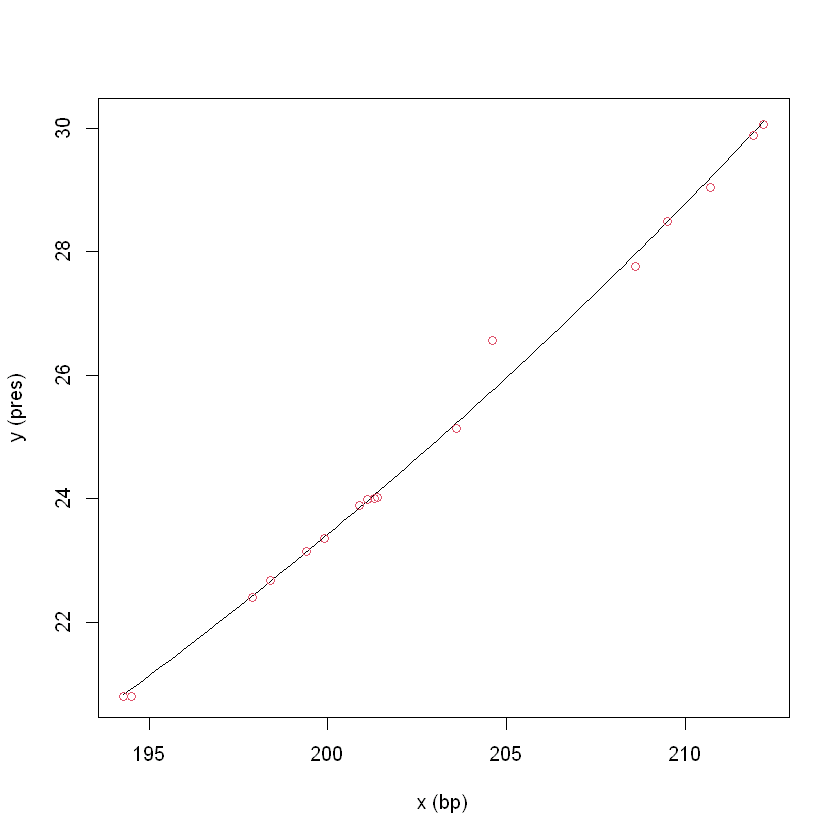

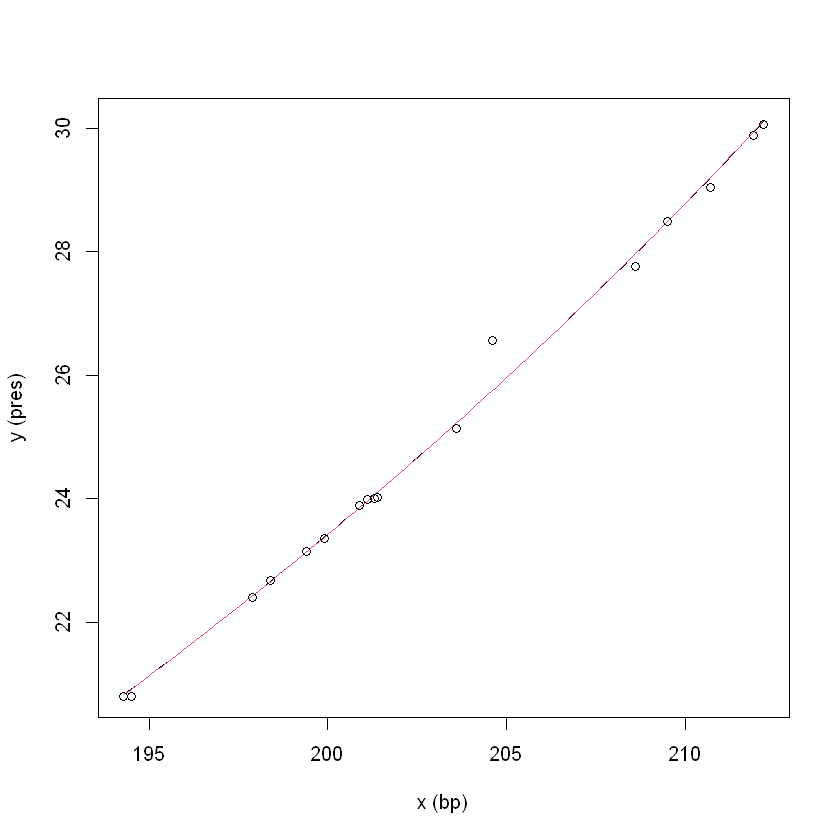

In [9]:
#' @param X the feature input matrix X
#' @param y the outcome vector y
#' @param theta parameter vector for the model (2-dimensional)
        
# Load MASS and data set forbes
library(MASS)
data(forbes)
attach(forbes)

# initialize the data set
X = cbind(rep(1,17),bp)
y = pres

# ---------- model_equation -----------------
#' function to represent your models via the parameter vector theta = c(theta_1, theta_2)
#' @return a predicted label y_hat for x
f <- function(x, theta){
  # Recall that x[1] is always 1 and x[2] is the feature value (bp)
  y_hat <- theta[1] * exp(theta[2]*x[2])
  
  return(y_hat)
}

# ------------- optim_coeff -----------------

#' @return a vector consisting of the optimal parameter vector 
optim_coeff <- function(X,y){
  
  #' @return the empirical risk of a parameter vector theta
  emp_risk <- function(theta){
    sum((log(y) - log(apply(X,1,f,theta)))^2)
  }
 
  return( 
    optim(c(0.4,0.5), 
          emp_risk, 
          method = "L-BFGS-B", 
          lower=c(0,-Inf), 
          upper=c(Inf,Inf))$par)
  # note that c(0.4,0.5) can be replaced by any other theta vector 
  # satisfying the constraint theta[1]>0
}

# optimal coefficients
hat_theta = optim_coeff(X,y)
cat("hat_theta = ", hat_theta, "\n")

# ------------ forbes_visually -----------------

f_x <- function(x, theta){
  
  return((theta[1] * exp(theta[2]*x)))
  
}

curve(f_x(x,theta = hat_theta),min(bp),max(bp),xlab="x (bp)",ylab="y (pres)")
points(pres~bp,col=2)

# ------------ forbes_mape -----------------

avg_perc_error <- function(X,y,theta){
  y_hat = apply(X,1,f,theta)
  perc_error = abs((y - y_hat)/y) * 100
  return(mean(perc_error))
}

cat("Mean Absolute Percentage Error (MAPE):", mape(X,y,hat_theta), "%\n")

# ------------ analytical_solution -----------------
hat_theta_2 = cov(bp,log(pres))/(var(bp)) 
hat_theta_1 = exp(mean(log(pres))-hat_theta_2*mean(bp))

curve(f_x(x,theta = hat_theta),min(bp),max(bp),xlab="x (bp)",ylab="y (pres)")
curve(f_x(x,theta = c(hat_theta_1,hat_theta_2)),min(bp),max(bp),add=T,col=2)
points(pres~bp)